***DISEASES SYMPTOMS PREDICTION***

**Importing of Dataset**

In [2]:
import pandas as pd

data = pd.read_csv('./Disease_symptom_and_patient_profile_dataset.csv')
data.head(10)

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
5,Eczema,Yes,No,No,No,25,Female,Normal,Normal,Positive
6,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive
7,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive
8,Hyperthyroidism,No,Yes,No,No,28,Female,Normal,Normal,Negative
9,Hyperthyroidism,No,Yes,No,No,28,Female,Normal,Normal,Negative


In [3]:
data.shape

(349, 10)

The dataset has 349 rows and 10 columns.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


**DATA CLEANING**

First, we will check for null values.

In [5]:
data.isnull().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

We have no null values in our dataset.
Hence, we move to transforming our categorical data from object type to float type.

**Number of Diseases**

By use of unique values we can see different number of diseases in the Dataset.

In [6]:
data['Disease'].value_counts()

Asthma                            23
Stroke                            16
Osteoporosis                      14
Hypertension                      10
Diabetes                          10
                                  ..
Autism Spectrum Disorder (ASD)     1
Hypoglycemia                       1
Fibromyalgia                       1
Eating Disorders (Anorexia,...     1
Williams Syndrome                  1
Name: Disease, Length: 116, dtype: int64

As per above, diseases like asthma, stroke, osteoporosis, hypertension and Diabetes are the most common. We have 116 different type of diseases.

***DATA VISUALIZATION***

Using seaborn and matplotlib libraries, we will visualize the data.

First, we will visualize the number of diseases.

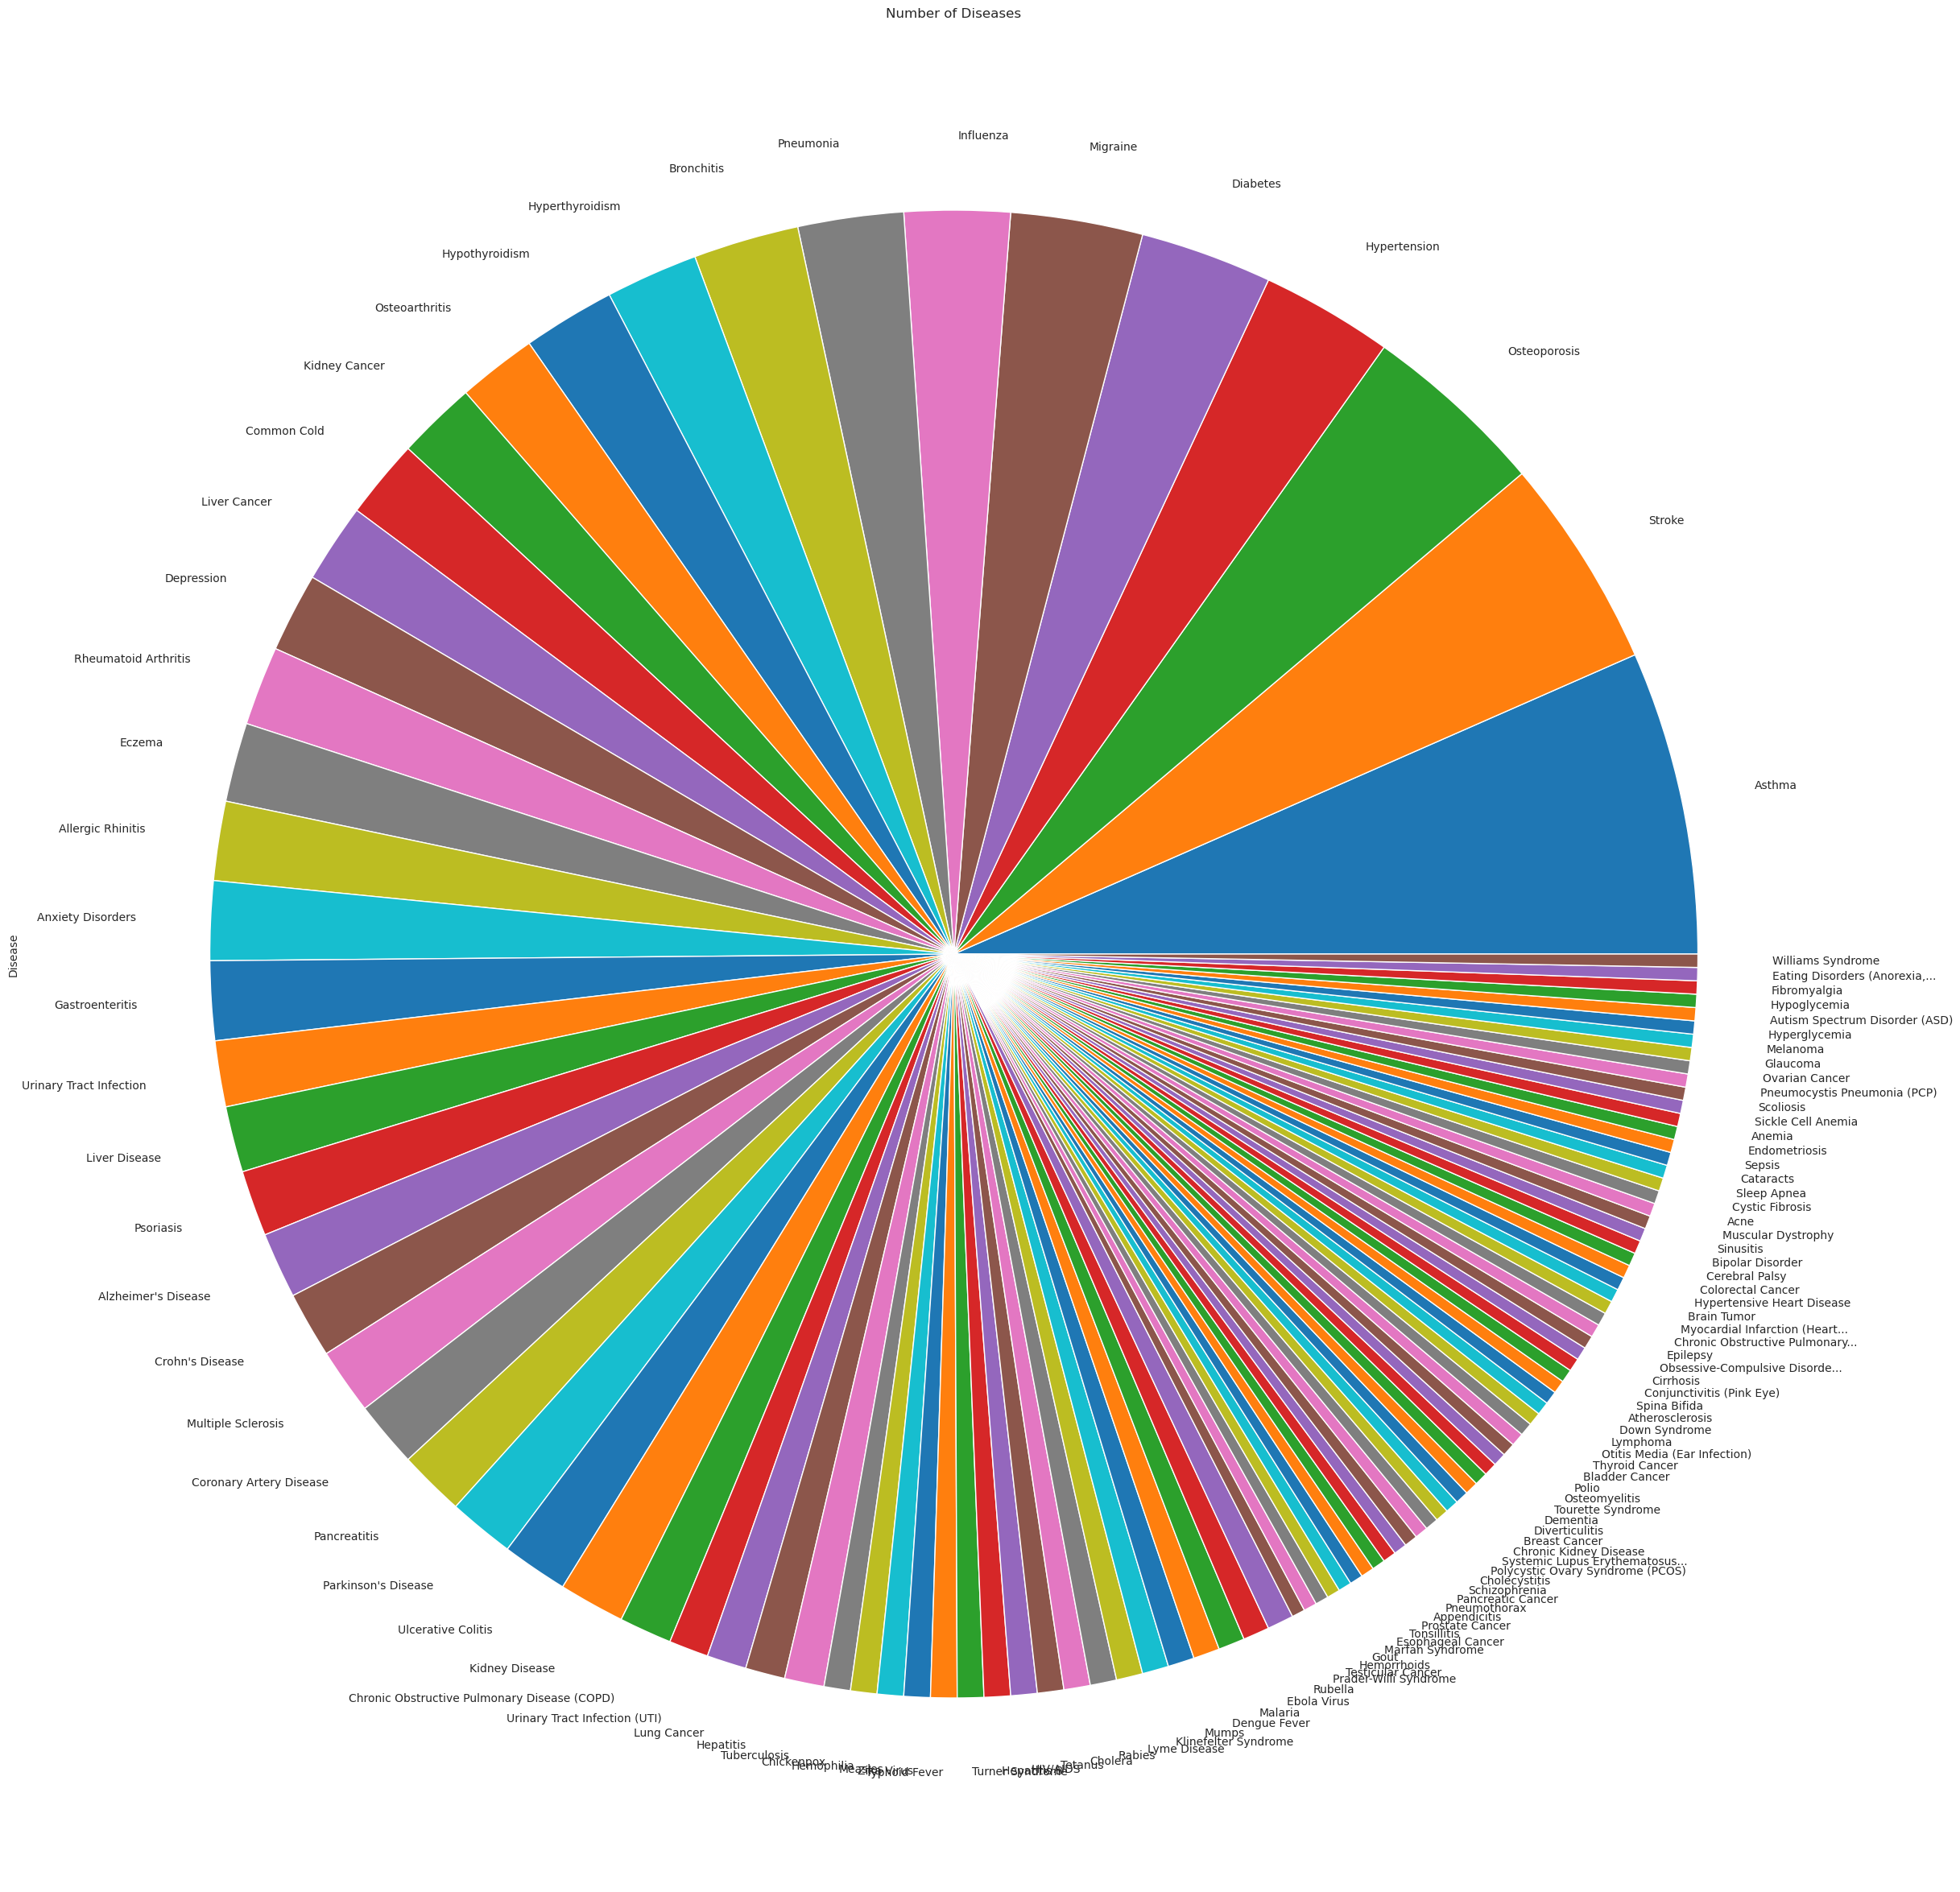

In [7]:

import matplotlib.pyplot as plt

disease_count = data['Disease'].value_counts()

disease_count.plot(kind='pie', figsize=(60, 30))
plt.xticks(rotation=60)
plt.title('Number of Diseases')
plt.show()

From the above pie chart, we can see that the most common diseases are asthma, stroke, osteoporosis, 
hypertension and Diabetes.Now we must check the variable outcome of the dataset. This will confirm if the 
patients tested positive or negative for the disease for Asthma patients.

Dealing with the outcome variable using a bar chart.

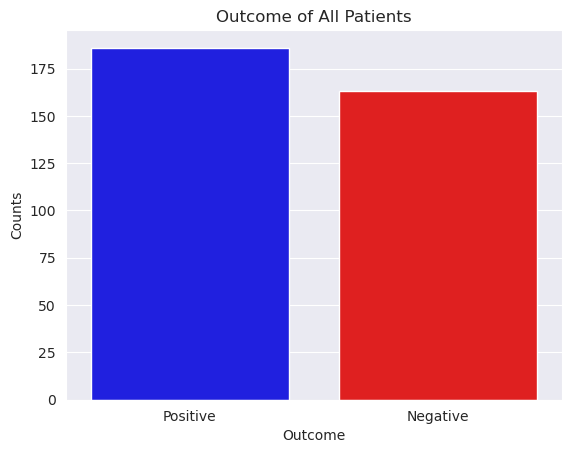

In [8]:
import seaborn as sns

positive_data = data[data['Outcome Variable'] == 'Positive']
negative_data = data[data['Outcome Variable'] == 'Negative']

#count of occurrence
positive_count = positive_data.shape[0]
negative_count = negative_data.shape[0]

sns.barplot(x=['Positive','Negative'],y=[positive_count, negative_count], palette=['blue','red'])
plt.title('Outcome of All Patients')
plt.xlabel('Outcome')
plt.ylabel('Counts')
plt.show()

In [9]:
data['Outcome Variable'].value_counts()

Positive    186
Negative    163
Name: Outcome Variable, dtype: int64

**Asthma Patients**

Asthma patients are the most in the dataset. Hence we will use them for further study on symptoms.

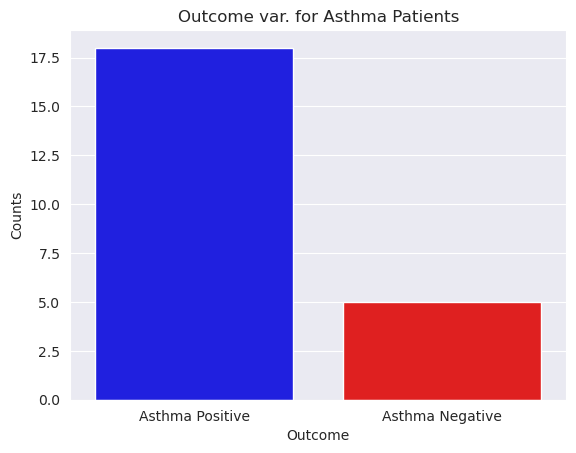

In [10]:
asthma_data = data[data['Disease'] == 'Asthma']

asthma_positive = asthma_data[asthma_data['Outcome Variable'] == 'Positive']
asthma_negative = asthma_data[asthma_data['Outcome Variable'] == 'Negative']

asthma_positive_count = asthma_positive.shape[0]
asthma_negative_count = asthma_negative.shape[0]

sns.barplot(x=['Asthma Positive','Asthma Negative'],y=[asthma_positive_count, asthma_negative_count], palette=['blue','red'])
plt.title('Outcome var. for Asthma Patients')
plt.xlabel('Outcome')
plt.ylabel('Counts')
plt.show()

18 patients tested positive as 5 tested negative. Lets check the asthma patients to the reffered questions.

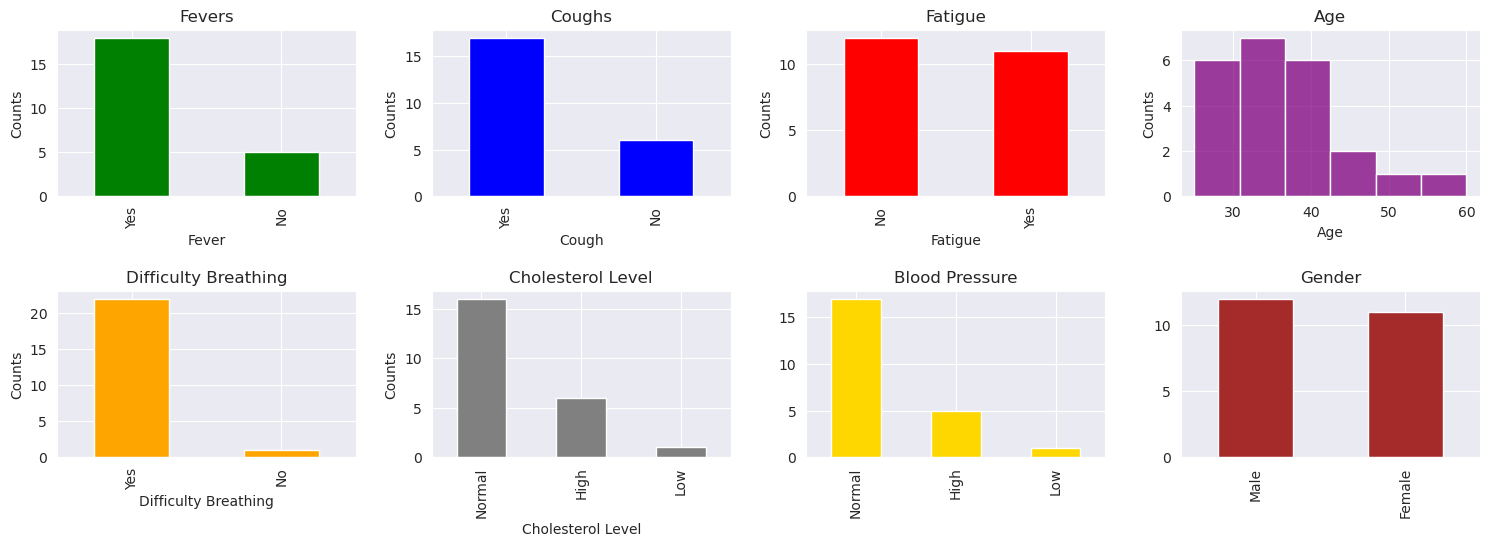

In [11]:
plt.figure(figsize=(15, 10))

#Plot 1: Fever
plt.subplot( 4, 4, 1)
asthma_data['Fever'].value_counts().plot(kind='bar', color='green')
plt.title('Fevers')
plt.xlabel('Fever')
plt.ylabel('Counts')

#Plot 2: Cough
plt.subplot(4, 4, 2)
asthma_data['Cough'].value_counts().plot(kind='bar', color='blue')
plt.title('Coughs')
plt.xlabel('Cough')
plt.ylabel('Counts')

#Plot 3: Fatigue
plt.subplot(4, 4, 3)
asthma_data['Fatigue'].value_counts().plot(kind='bar', color = 'red')
plt.title('Fatigue')
plt.xlabel('Fatigue')
plt.ylabel('Counts')

#Plot 4: Age
plt.subplot(4, 4, 4)
sns.histplot(x = 'Age', data = asthma_data, color='purple')
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Counts')

#Plot 5: Difficulty breathing
plt.subplot(4, 4, 5)
asthma_data['Difficulty Breathing'].value_counts().plot(kind='bar', color='orange')
plt.title('Difficulty Breathing')
plt.xlabel('Difficulty Breathing')
plt.ylabel('Counts')

#Plot 6: Cholesterol Level
plt.subplot(4, 4, 6)
asthma_data['Cholesterol Level'].value_counts().plot(kind='bar', color='gray')
plt.title('Cholesterol Level')
plt.xlabel('Cholesterol Level')
plt.ylabel('Counts')

#Plot 7: Blood  Pressure
plt.subplot(4, 4, 7)
asthma_data['Blood Pressure'].value_counts().plot(kind='bar', color='gold')
plt.title('Blood Pressure')

#Plot 8: Gender
plt.subplot(4, 4, 8)
asthma_data['Gender'].value_counts().plot(kind='bar', color='brown')
plt.title('Gender')

#Layout Adjust and show
plt.tight_layout()

plt.show()


The main reasons as per the graph for diagnosis of Asthma are Fevers, Coughs and Difficulty Breathing. As for Fatigue and Gender have some impact but to only 50% of the total population.
  

**Stroke**

We will now move to the second most common disease, Stroke. We will check the symptoms for the same.

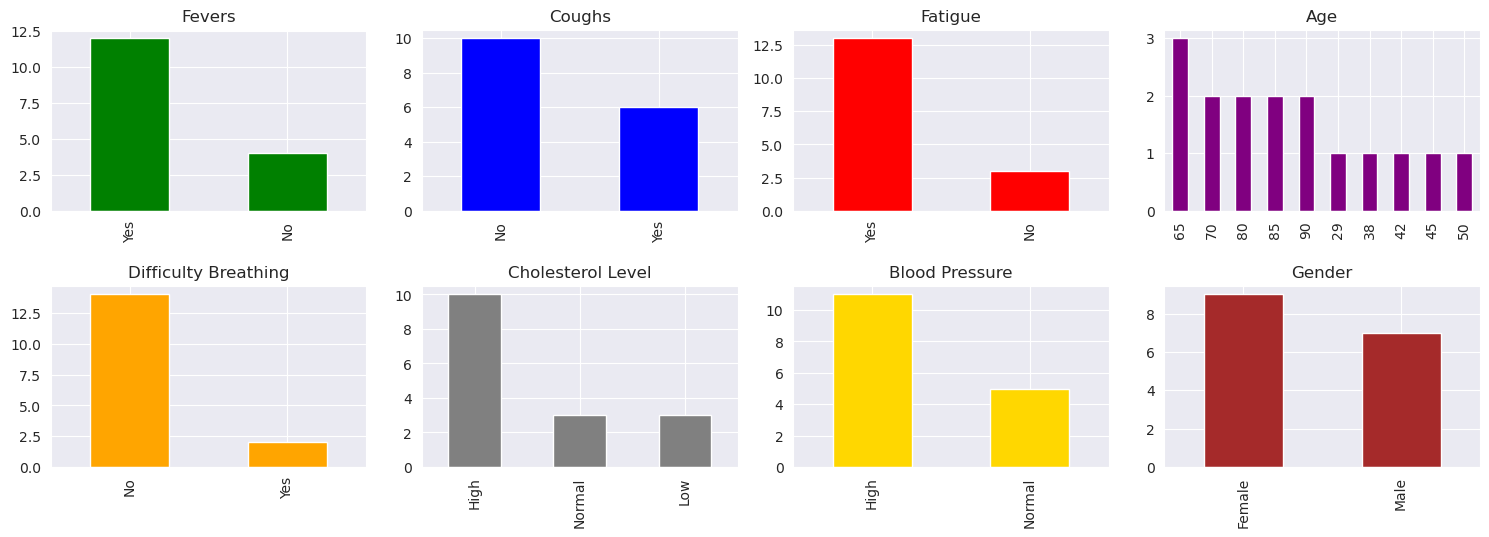

In [12]:
stroke_data = data[data['Disease'] == 'Stroke']

plt.figure(figsize=(15, 10))

#Plot 1: Fever
plt.subplot( 4, 4, 1)
stroke_data['Fever'].value_counts().plot(kind='bar', color='green')
plt.title('Fevers')

#Plot 2: Cough
plt.subplot(4, 4, 2)
stroke_data['Cough'].value_counts().plot(kind='bar', color='blue')
plt.title('Coughs')

#Plot 3: Fatigue
plt.subplot(4, 4, 3)
stroke_data['Fatigue'].value_counts().plot(kind='bar', color = 'red')
plt.title('Fatigue')

#Plot 4: Age
plt.subplot(4, 4, 4)
stroke_data['Age'].value_counts().plot(kind='bar', color='purple')
plt.title('Age')

#Plot 5: Difficulty breathing
plt.subplot(4, 4, 5)
stroke_data['Difficulty Breathing'].value_counts().plot(kind='bar', color='orange')
plt.title('Difficulty Breathing')

#Plot 6: Cholesterol Level
plt.subplot(4, 4, 6)
stroke_data['Cholesterol Level'].value_counts().plot(kind='bar', color='gray')
plt.title('Cholesterol Level')

#Plot 7: Blood  Pressure
plt.subplot(4, 4, 7)
stroke_data['Blood Pressure'].value_counts().plot(kind='bar', color='gold')
plt.title('Blood Pressure')

#plot 8: Gender
plt.subplot(4, 4, 8)
stroke_data['Gender'].value_counts().plot(kind='bar', color='brown')
plt.title('Gender')

#Layout Adjust and show
plt.tight_layout()

plt.show()


In [13]:
stroke_data['Outcome Variable'].value_counts()

Positive    11
Negative     5
Name: Outcome Variable, dtype: int64

<AxesSubplot: >

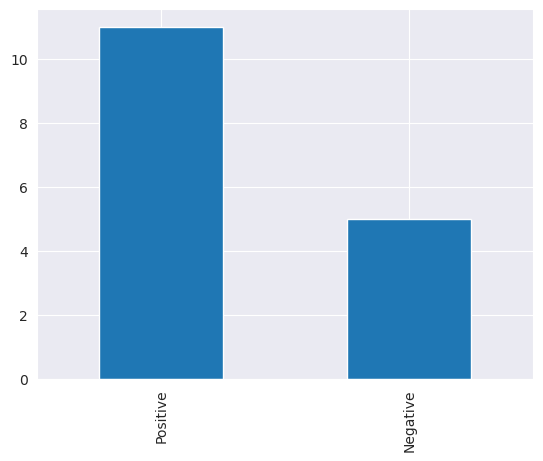

In [14]:
stroke_data['Outcome Variable'].value_counts().plot(kind='bar')

Those are just examples of visualizing the diseases with possible causes.

***FEATURE SELECTION***

First we will have to convert our categorical data to numerical.

In [15]:
#using a function that will transform all columns except Disease column
from sklearn.preprocessing import LabelEncoder

def transform_data(data):
    label_encoder = LabelEncoder()
    for column in data.columns:
        if column != 'Disease':
            if data[column].dtype == 'object':
                data[column] = label_encoder.fit_transform(data[column])
            
    return data

data = transform_data(data)
data.head(10)

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,1,0,1,1,19,0,1,2,1
1,Common Cold,0,1,1,0,25,0,2,2,0
2,Eczema,0,1,1,0,25,0,2,2,0
3,Asthma,1,1,0,1,25,1,2,2,1
4,Asthma,1,1,0,1,25,1,2,2,1
5,Eczema,1,0,0,0,25,0,2,2,1
6,Influenza,1,1,1,1,25,0,2,2,1
7,Influenza,1,1,1,1,25,0,2,2,1
8,Hyperthyroidism,0,1,0,0,28,0,2,2,0
9,Hyperthyroidism,0,1,0,0,28,0,2,2,0


Now our data is in numeric form.

Importing libraries important for feature selection. Then separate the feauture variable from target variables.

In [16]:
#splitting the data into features and target
X = data.drop(columns = ['Outcome Variable', 'Disease'])
y = data['Outcome Variable']

#display the shape of X and y
print("Shape of features: ", X.shape)
print("Shape of target: ", y.shape)


Shape of features:  (349, 8)
Shape of target:  (349,)


Lets conduct an exploratory data analysis to understand their distributions and relationships between the features and target variables.

In [17]:
X.describe()

,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level
count,349.000000,349.000000,349.00000,349.000000,349.000000,349.000000,349.000000,349.000000
mean,0.501433,0.478510,0.69341,0.252149,46.323782,0.495702,0.991404,0.951289
std,0.500716,0.500255,0.46174,0.434870,13.085090,0.500699,0.975231,0.950154
min,0.000000,0.000000,0.00000,0.000000,19.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,35.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.00000,0.000000,45.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.00000,1.000000,55.000000,1.000000,2.000000,2.000000
max,1.000000,1.000000,1.00000,1.000000,90.000000,1.000000,2.000000,2.000000


Summary Statistics: 


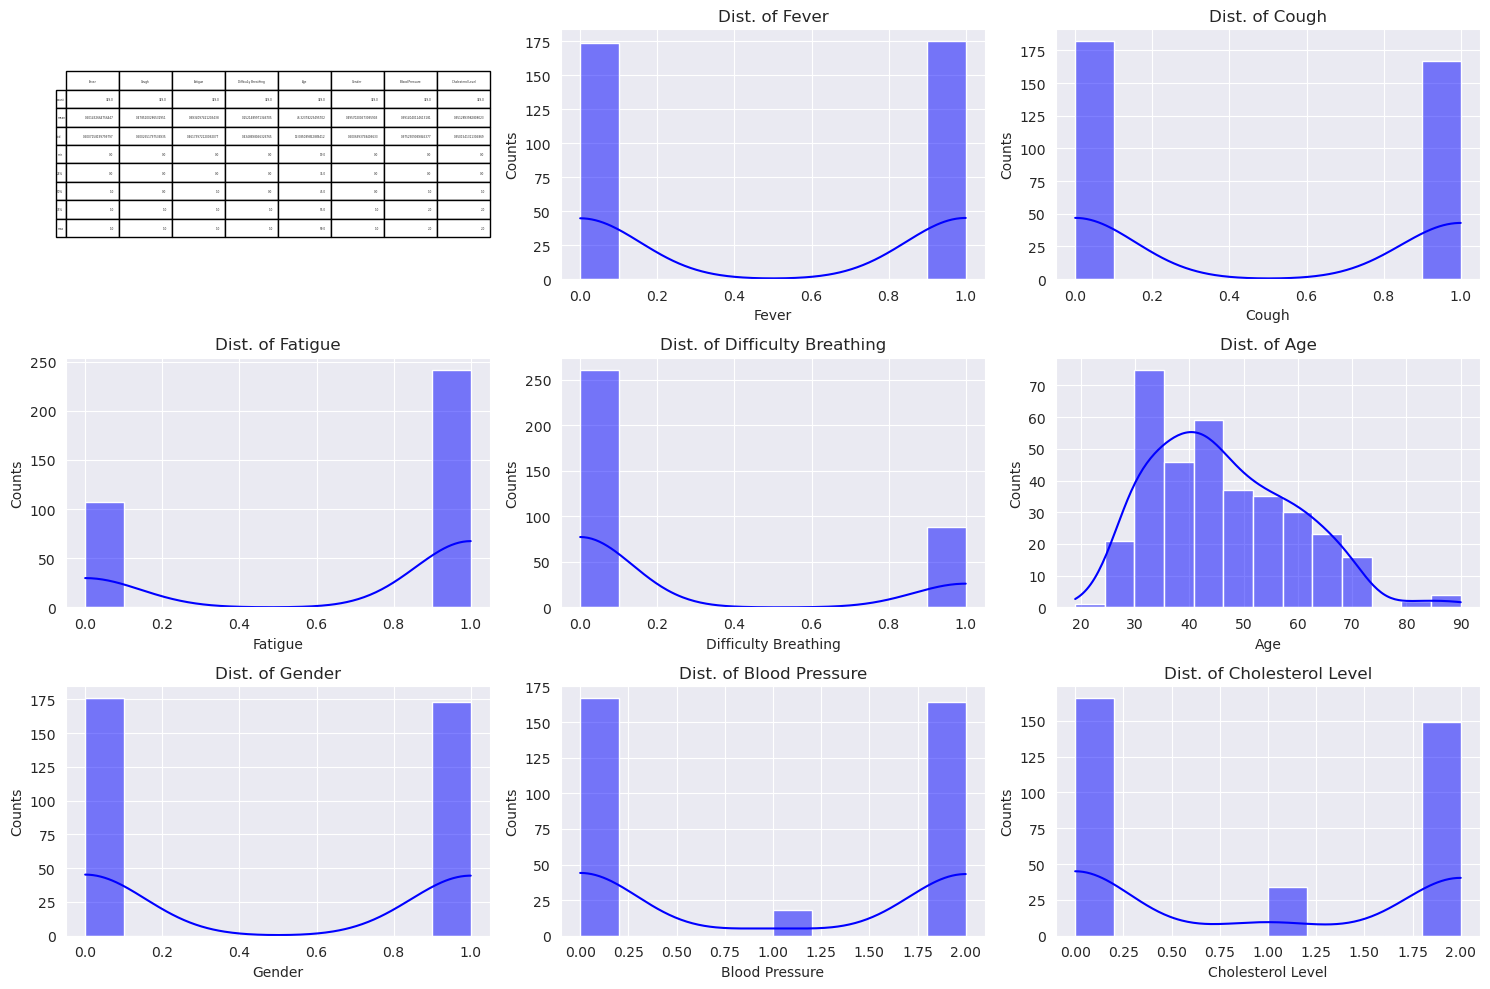

In [18]:
plt.figure(figsize=(15, 10)) 

#summary statistics  
plt.subplot(3, 3, 1) 
print('Summary Statistics: ')  
plt.axis('off')
plt.table(cellText=X.describe().values, rowLabels=X.describe().index, colLabels=X.describe().columns, loc='center')

# Visualizing the distribution of features  
num_features = X.select_dtypes(include=['int64', 'float64']).columns
for i, feature in enumerate(num_features, start=2):
    plt.subplot(3, 3, i)
    sns.histplot(X[feature],kde=True, color='blue')
    plt.title(f'Dist. of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Counts')

plt.tight_layout()

plt.show()

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'Fever'),
  Text(1.5, 0, 'Cough'),
  Text(2.5, 0, 'Fatigue'),
  Text(3.5, 0, 'Difficulty Breathing'),
  Text(4.5, 0, 'Age'),
  Text(5.5, 0, 'Gender'),
  Text(6.5, 0, 'Blood Pressure'),
  Text(7.5, 0, 'Cholesterol Level')])

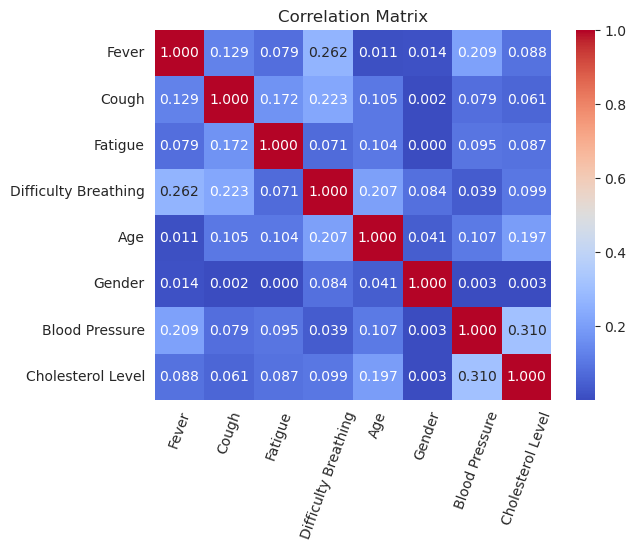

In [19]:
#Correlation matrix
corr_matrix = X.corr().abs()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Correlation Matrix')
plt.xticks(rotation=70)

The correlation matrix shows the least correlated and most correlated. Let's examine features that highly correlate but as per the graph above there no features that highly correlate. 

**Normality testing**

In [20]:
#Test for normality
from scipy.stats import shapiro

for cols in X.columns:
    stat, p = shapiro(X[cols])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print(f'{cols} is normally distributed')
    else:
        print(f'{cols} is not normally distributed')
        

Statistics=0.637, p=0.000
Fever is not normally distributed
Statistics=0.636, p=0.000
Cough is not normally distributed
Statistics=0.580, p=0.000
Fatigue is not normally distributed
Statistics=0.540, p=0.000
Difficulty Breathing is not normally distributed
Statistics=0.960, p=0.000
Age is not normally distributed
Statistics=0.636, p=0.000
Gender is not normally distributed
Statistics=0.668, p=0.000
Blood Pressure is not normally distributed
Statistics=0.694, p=0.000
Cholesterol Level is not normally distributed


***Model Selection***

In [25]:
#import of needed libraries
from sklearn.model_selection import train_test_split

#splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')


Shape of X_train: (279, 8)
Shape of X_test: (70, 8)
Shape of y_train: (279,)
Shape of y_test: (70,)


In [24]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 78.57%


In [22]:
import joblib

joblib.dump(model, 'disease_symptoms_prediction_model.pkl')

['disease_symptoms_prediction_model.pkl']